#Intro to dataset
1. If I'm a scientist trying to make classifications of iris species, would like to develop a model that would predict the irisi specifies if given the sepal length and width and petal length and width. 

In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Import dataset
data = pd.read_csv("./Iris.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [25]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
121,122,5.6,2.8,4.9,2.0,Iris-virginica
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
140,141,6.7,3.1,5.6,2.4,Iris-virginica
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
46,47,5.1,3.8,1.6,0.2,Iris-setosa


In [26]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


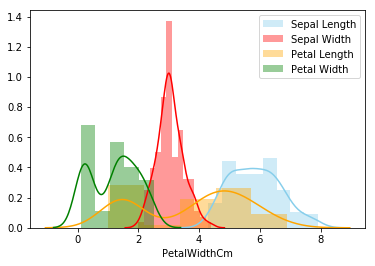

In [34]:
sns.distplot( data["SepalLengthCm"] , color="skyblue", label="Sepal Length")
sns.distplot( data["SepalWidthCm"] , color="red", label="Sepal Width")
sns.distplot( data["PetalLengthCm"], color="orange", label = "Petal Length")
sns.distplot( data["PetalWidthCm"], color="green", label = "Petal Width")
plt.legend()
plt.show()


In [60]:
replace_map = {'Species': {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}}

In [62]:
data.replace(replace_map, inplace=True)


In [64]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
5,6,5.4,3.9,1.7,0.4,1
6,7,4.6,3.4,1.4,0.3,1
7,8,5.0,3.4,1.5,0.2,1
8,9,4.4,2.9,1.4,0.2,1
9,10,4.9,3.1,1.5,0.1,1


In [65]:
#Train/Test

X = data[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


X_train = X_train.sort_index()
y_train = y_train.sort_index()

In [66]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE:', mean_absolute_error(y_predict, y_test))
print('MSE:', mean_squared_error(y_predict, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_predict, y_test)))

MAE: 0.18688274464717297
MSE: 0.05268357461108636
RMSE: 0.2295290278180221


C:\Users\lyun002\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


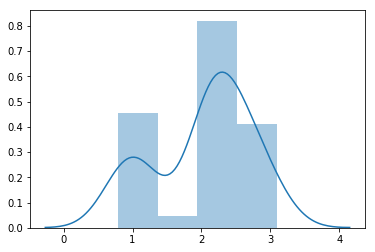

In [70]:
sns.distplot(y_predict)

In [71]:
pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficients'])

,Coefficients
SepalLengthCm,-0.070890
SepalWidthCm,-0.122647
PetalLengthCm,0.154545
PetalWidthCm,0.711869


In [72]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()

In [73]:
rfc.fit(X_train, y_train)

C:\Users\lyun002\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

rfc_prediction = rfc.predict(X_test)
rfc_matrix = confusion_matrix(y_test, rfc_prediction)
rfc_report = classification_report(y_test, rfc_prediction)
print(rfc_matrix)
print(rfc_report)

[[10  0  0]
 [ 0 17  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [79]:
dtc.fit(X_train, y_train)
dtc_prediction = dtc.predict(X_test)
dtc_matrix = confusion_matrix(y_test, dtc_prediction)
dtc_report = classification_report(y_test, dtc_prediction)
print(dtc_matrix)
print(dtc_report)

[[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.94      1.00      0.97        17
           3       1.00      0.91      0.95        11

   micro avg       0.97      0.97      0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [54]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [40, 50, 60, 90]
}
model = RandomForestClassifier()
gridcv = GridSearchCV(model,param_grid=param_grid,n_jobs=4, verbose=2)
gridcv.fit(X,y)

C:\Users\lyun002\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   23.9s
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:   26.4s finished
C:\Users\lyun002\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [50, 100, 200, 500], 'max_depth': [40, 50, 60, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [81]:
gridcv.best_score_
gridcv.best_params_
df = pd.DataFrame(gridcv.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.160763      0.044193         0.018720        0.007148   
1        0.209557      0.035203         0.019722        0.010173   
2        0.389702      0.014235         0.031751        0.000946   
3        1.027399      0.063055         0.065509        0.006567   
4        0.093248      0.009298         0.009024        0.001417   
5        0.252671      0.085832         0.016377        0.003309   
6        0.296455      0.005573         0.027406        0.000473   
7        0.920113      0.061002         0.102942        0.002627   
8        0.077205      0.002456         0.018716        0.016544   
9        0.231616      0.009926         0.024399        0.006034   
10       0.487296      0.028465         0.048796        0.016543   
11       1.177798      0.071297         0.086898        0.021541   
12       0.108617      0.027516         0.015708        0.005002   
13       0.205547      0.079412         0.016711

C:\Users\lyun002\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lyun002\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lyun002\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*war

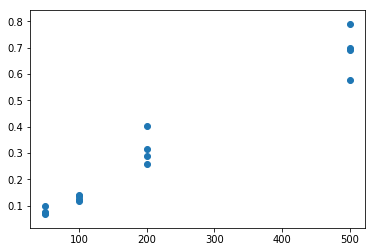

In [57]:
plt.scatter(df['param_n_estimators'], df['mean_fit_time'])

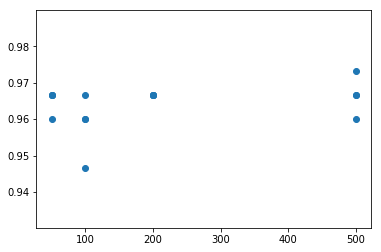

In [83]:
plt.scatter(df['param_n_estimators'], df['mean_test_score'])

##Conclusion
Petal width is best predictor for species. 
RFC is the most accurate model to use for prediction.